# Multi-focus image fusion by MFF-SSIM model

1. Import some functions

In [5]:
import torch
from MFF import MFF
from skimage.io import imread

2. Read source images

In [9]:
def to_tensor(a):
    return torch.from_numpy(a).permute(2,0,1).to(torch.float32)/255.

x1 = to_tensor(imread(r'.\test_image\coffee\image1.tif'))
x2 = to_tensor(imread(r'.\test_image\coffee\image2.tif'))
x = torch.stack((x1,x2), dim=0).cpu()

3. Create model

In [10]:
model = MFF(input = x, map_mode = 'lap')

4. Train this model

In [11]:
model.train(max_iter=300)

======================MFF-SSIM Fusion======================
*Configuration* -> [Focus map: lap], [Window Size: 25]
*Configuration* -> [Iterations: 300], [Learning Rate: 0.001]
*Configuration* -> [Deivce: cpu], [Dtype: torch.float32]
*Configuration* -> [#Images x Channel x Height x Width: 2 x 3 x 868 x 568]
*Fusion Starts* -> 2019-12-17 22:17:38
       No. Iteration        MFF-SSIM Value
      -------------------------------------
            1                  0.896753
           11                  0.919989
           21                  0.932140
           31                  0.940687
           41                  0.947213
           51                  0.952431
           61                  0.956741
           71                  0.960406
           81                  0.963591
           91                  0.966407
          101                  0.968933
          111                  0.971234
          121                  0.973359
          131                  0.975339
      

5. Show some information

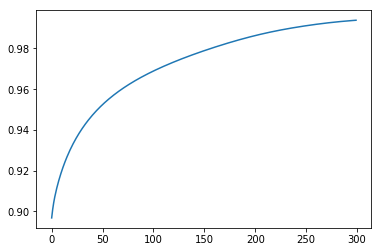

In [12]:
model.show_curve() # mff-ssim value 

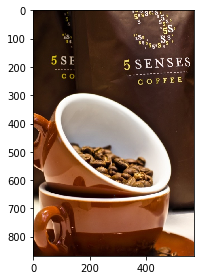

In [13]:
model.show_image() # fused image

In [14]:
model.save_image('./result/coffee_cpu.png') # save image 

C:\Users\win10\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
